## Выявление расстройств личности у пользователей Twitter

#### Была собрана информация о пользователях Твиттера с различными диагностированными расстройствами личности. А именно: коллекция их твитов, сделанных за некоторое время до постановки диагноза. В качестве контрольной группы выступали пользователи, у которых расстройств личности диагностировано не было, и коллекция их твитов.

In [1]:
import pandas as pd
import numpy as np

#### Данные это коллекция твитов пользователей, опубликованных в течение недели за месяц до постановки диагноза, в случае нездоровых пользователей, и твитов, опубликованных в течение недели, для здоровых пользователей.

In [2]:
data = pd.read_excel('users_month_ago.xlsx', index=None)
data

,Unnamed: 0,0,texts
0,0,borderline,['@SomuchFUNFUNFUN это автоперевод в браузере'...
1,1,borderline,"['хехе https://t.co/AKiZ4FpNm3', '👀😈 https://t..."
2,2,borderline,['RT @nirvanaslyric: I don’t care what you thi...
3,3,schizoid,"['Так неловко, когда приходят уведомления о ла..."
4,4,dissociative_identity,[]
5,5,borderline,"['@vataTaeTae pretty https://t.co/gpjT7PeoF3',..."
6,6,schizoaffective,"['tehehe~ \\ΦωΦ/ https://t.co/vXzux9dwFQ', 'RT..."
7,7,borderline,['Теперь я действительно начинаю гордиться тем...
8,8,bipolar,"['Продрогшими руками закрываешь холодный, тяже..."
9,9,anxiety,['@vla_da Засыпала с ним отлично. Но ночью про...


#### Удаляем ссылки и ники пользователей из твитов

In [3]:
import re

for i in range(len(data)):
    data.loc[i, 'texts'] = re.sub('@[\w]+','',data.loc[i, 'texts'])
    data.loc[i, 'texts'] = re.sub(r"http\S+", "", data.loc[i, 'texts'])

#### Исправляем ошибки в твитах

In [4]:
import pyaspeller
from pyaspeller import YandexSpeller
speller = YandexSpeller()
for i in range(len(data)):
    data.loc[i, 'texts_spelled'] = speller.spelled(data.loc[i, 'texts'])

In [5]:
data.rename(columns={0: 'labels'}, inplace=True)
data = data.drop(data.columns[[0]], axis=1)
data

,labels,texts,texts_spelled
0,borderline,"[' это автоперевод в браузере', 'не скажу, что...","[' это автоперевод в браузере', 'не скажу, что..."
1,borderline,"['хехе '👀😈 ""i guess...it's me? ' Можно и мн...","['['хе хе '👀😈 ""i guess...it's me? ' Можно и..."
2,borderline,['RT : I don’t care what you think unless it i...,['RT : I don’t care what you think unless it i...
3,schizoid,"['Так неловко, когда приходят уведомления о ла...","['Так неловко, когда приходят уведомления о ла..."
4,dissociative_identity,[],[]
5,borderline,[' pretty ' если бы было можно я б раздала их...,[' pretty ' если бы было можно я б раздала их...
6,schizoaffective,"['tehehe~ \\ΦωΦ/ 'RT : Не думала, что мне ког...","['tehehe~ \\ΦωΦ/ ''RT : Не думала, что мне ко..."
7,borderline,['Теперь я действительно начинаю гордиться тем...,['Теперь я действительно начинаю гордиться тем...
8,bipolar,"['Продрогшими руками закрываешь холодный, тяже...","['Продрогшими руками закрываешь холодный, тяже..."
9,anxiety,[' Засыпала с ним отлично. Но ночью просыпалас...,[' Засыпала с ним отлично. Но ночью просыпалас...


#### Разбиваем текст на токены

In [6]:
import nltk
data['texts_tokenized'] = data['texts'].map(nltk.word_tokenize)

#### Удаляем стоп-слова

In [7]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
data['texts_tokenized_clean'] = data['texts_tokenized'].map(lambda row: ' '.join(
    [token for token in row if not token.lower() in stopwords]))

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Добавим бинарные метки классов

In [8]:
data['labels'].unique()[0:-1]
data['binary_labels'] = data['labels'].replace(data['labels'].unique()[0:-1], 'unhealthy')


In [9]:
data

,labels,texts,texts_spelled,texts_tokenized,texts_tokenized_clean,binary_labels
0,borderline,"[' это автоперевод в браузере', 'не скажу, что...","[' это автоперевод в браузере', 'не скажу, что...","[[, ', это, автоперевод, в, браузере, ', ,, 'н...","[ ' это автоперевод браузере ' , 'не скажу , г...",unhealthy
1,borderline,"['хехе '👀😈 ""i guess...it's me? ' Можно и мн...","['['хе хе '👀😈 ""i guess...it's me? ' Можно и...","[[, 'хехе, '👀😈, ``, i, guess, ..., it, 's, me,...",[ 'хехе '👀😈 `` i guess ... it 's me ? ' пожалу...,unhealthy
2,borderline,['RT : I don’t care what you think unless it i...,['RT : I don’t care what you think unless it i...,"[[, 'RT, :, I, don, ’, t, care, what, you, thi...",[ 'RT : I don ’ t care what you think unless i...,unhealthy
3,schizoid,"['Так неловко, когда приходят уведомления о ла...","['Так неловко, когда приходят уведомления о ла...","[[, 'Так, неловко, ,, когда, приходят, уведомл...","[ 'Так неловко , приходят уведомления лайках к...",unhealthy
4,dissociative_identity,[],[],"[[, ]]",[ ],unhealthy
5,borderline,[' pretty ' если бы было можно я б раздала их...,[' pretty ' если бы было можно я б раздала их...,"[[, ', pretty, ', если, бы, было, можно, я, б,...","[ ' pretty ' б раздала арми бесплатно ' , ' св...",unhealthy
6,schizoaffective,"['tehehe~ \\ΦωΦ/ 'RT : Не думала, что мне ког...","['tehehe~ \\ΦωΦ/ ''RT : Не думала, что мне ко...","[[, 'tehehe~, \\ΦωΦ/, 'RT, :, Не, думала, ,, ч...","[ 'tehehe~ \\ΦωΦ/ 'RT : думала , когда-нибудь ...",unhealthy
7,borderline,['Теперь я действительно начинаю гордиться тем...,['Теперь я действительно начинаю гордиться тем...,"[[, 'Теперь, я, действительно, начинаю, гордит...","[ 'Теперь действительно начинаю гордиться , пр...",unhealthy
8,bipolar,"['Продрогшими руками закрываешь холодный, тяже...","['Продрогшими руками закрываешь холодный, тяже...","[[, 'Продрогшими, руками, закрываешь, холодный...","[ 'Продрогшими руками закрываешь холодный , тя...",unhealthy
9,anxiety,[' Засыпала с ним отлично. Но ночью просыпалас...,[' Засыпала с ним отлично. Но ночью просыпалас...,"[[, ', Засыпала, с, ним, отлично, ., Но, ночью...",[ ' Засыпала отлично . ночью просыпалась часто...,unhealthy


#### Поэкспериментируем со стандартными классификаторами

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [11]:
def text_classifier(vectorizer, transformer, classifier):
    return Pipeline(
            [("vectorizer", vectorizer),
            ("transformer", transformer),
            ("classifier", classifier)]
        )

In [12]:
for clf in [LogisticRegression, LinearSVC, SGDClassifier]:
    print(clf)
    print(cross_val_score(text_classifier(CountVectorizer(), TfidfTransformer(), clf(max_iter=1000)), data['texts'], data['binary_labels']).mean())
    print("\n")

<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.7307692307692308


<class 'sklearn.svm.classes.LinearSVC'>
0.7307692307692308


<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
0.7307692307692308




In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[17:36, 'texts'], data.loc[17:36, 'binary_labels'], test_size=0.2, random_state=42)

In [14]:
for clf in [LogisticRegression, LinearSVC, SGDClassifier]:
    print(clf)
    print(cross_val_score(text_classifier(CountVectorizer(), TfidfTransformer(), clf(max_iter=1000)), data.loc[17:36, 'texts'], data.loc[17:36, 'binary_labels']).mean())
    print("\n")

<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.6944444444444445


<class 'sklearn.svm.classes.LinearSVC'>
0.6944444444444445


<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
0.6527777777777778




In [15]:
%%time
from sklearn.decomposition import NMF, TruncatedSVD
print(cross_val_score(text_classifier(TfidfVectorizer(), TruncatedSVD(n_components=1000), SVC(kernel='rbf')),
                      data.loc[17:36, 'texts'], 
                      data.loc[17:36, 'binary_labels']
                     ).mean())

NameError: name 'SVC' is not defined

In [16]:
%%time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
print(cross_val_score(
    Pipeline([
            ("vectorizer", CountVectorizer()),
            ("transformer", TruncatedSVD(100)),
            ("classifier", RandomForestClassifier(100))
        ]),
    data.loc[17:36, 'texts'],
    data.loc[17:36, 'binary_labels']
    ).mean())

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.5
Wall time: 2.76 s


In [17]:
%%time
print(cross_val_score(text_classifier(CountVectorizer(), TruncatedSVD(n_components=1000), RandomForestClassifier(1000)),
                      data.loc[17:36, 'texts'],
                      data.loc[17:36, 'binary_labels']
                     ).mean())

0.38888888888888884
Wall time: 13.3 s


In [18]:
%%time
print(cross_val_score(text_classifier(TfidfVectorizer(), TruncatedSVD(n_components=1000), RandomForestClassifier(1000)),
                      data.loc[17:36, 'texts'],
                      data.loc[17:36, 'binary_labels']
                     ).mean())

0.8055555555555557
Wall time: 22.6 s


In [19]:
%%time
print(cross_val_score(text_classifier(TfidfVectorizer(), TruncatedSVD(n_components=1000), RandomForestClassifier(1000)),
                      data['texts'],
                      data['binary_labels']
                     ).mean())

0.7307692307692308
Wall time: 20.2 s


In [20]:
from sklearn.pipeline import FeatureUnion

estimators = [('tfidf', TfidfTransformer()), ('svd', TruncatedSVD(n_components=1000))]
combined = FeatureUnion(estimators)

In [21]:
%%time
print(cross_val_score(
    Pipeline([
            ("vectorizer", CountVectorizer()),
            ("transformer", combined),
            ("classifier", RandomForestClassifier(1000))
        ]),
    data.loc[17:36, 'texts'],
    data.loc[17:36, 'binary_labels']
    ).mean())

0.6527777777777777
Wall time: 21 s


In [22]:
%%time
print(cross_val_score(
    Pipeline([
            ("vectorizer", CountVectorizer()),
            ("transformer", combined),
            ("classifier", LinearSVC())
        ]),
    data['texts'],
    data['binary_labels']
    ).mean())

0.6517094017094017
Wall time: 3.22 s


In [23]:
print(cross_val_score(text_classifier(TfidfVectorizer(), TruncatedSVD(n_components=1000), RandomForestClassifier(1000)),
                      data.loc[17:36, 'texts'],
                      data.loc[17:36, 'binary_labels']
                     ).mean())

0.75


### Морфологический анализ

In [24]:
!pip install pymystem3
import pymystem3

mystem=pymystem3.Mystem()
demo = mystem.analyze(data.loc[5, 'texts_tokenized_clean'])

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
lb = preprocessing.LabelBinarizer()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[17:36, 'texts'],
                      data.loc[17:36, 'binary_labels'], test_size=0.33, random_state=42)

In [28]:
clf = text_classifier(TfidfVectorizer(), TruncatedSVD(n_components=1000), SVC(kernel='linear', probability=True)).fit(
                    X_train,
                    y_train)
roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])

0.3333333333333333

### Сделаем обработчик данных, который будет возвращать данные, размеченные по признакам, важным для выявления расстройств личности

In [29]:
def data_preparator(data):
    import re
    replies=[0] * len(data)
    retweets=[0] * len(data)
    questions=[0] * len(data)
    shares=[0] * len(data)
    
    for i in range(len(data)):
        for tweet in data.loc[i, 'texts'].split('\', \''):
            if ('@' in tweet) & ('RT' not in tweet):
                replies[i] += 1
            if 'RT' in tweet:
                retweets[i] += 1
            if '?' in tweet:
                questions[i] += 1
            if 'http' in tweet:
                shares[i] += 1
                
        data.loc[i, 'texts'] = re.sub('@[\w]+','',data.loc[i, 'texts'])
        data.loc[i, 'texts'] = re.sub(r"http\S+", "", data.loc[i, 'texts'])
    
    import pyaspeller
    from pyaspeller import YandexSpeller
    speller = YandexSpeller()
    for i in range(len(data)):
        data.loc[i, 'texts_spelled'] = speller.spelled(data.loc[i, 'texts'])
    
    data.rename(columns={0: 'labels'}, inplace=True)
    data = data.drop(data.columns[[0]], axis=1)
    
    import nltk
    data['texts_tokenized'] = data['texts'].map(nltk.word_tokenize)
    
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('russian')
    data['texts_tokenized_clean'] = data['texts_tokenized'].map(lambda row: ' '.join(
        [token for token in row if not token.lower() in stopwords]))
    
    data['binary_labels'] = data['labels'].replace(data['labels'].unique()[0:-1], 'unhealthy')
    
    n_words=[0] * len(data)
    n_tweets=[0] * len(data)
    n_1p_single=[0] * len(data)
    n_obsc=[0] * len(data)
    n_pro=[0] * len(data)
    n_pro_1p=[0] * len(data)
    n_pro_2p_3p=[0] * len(data)
    n_pro_sg=[0] * len(data)
    n_pro_pl=[0] * len(data)
    n_conj=[0] * len(data)
    n_part=[0] * len(data)
    n_verb=[0] * len(data)
    n_verb_praet=[0] * len(data)
    n_verb_inpraes=[0] * len(data)
    n_verb_inf=[0] * len(data)
    n_verb_sg=[0] * len(data)
    n_verb_pl=[0] * len(data)
    n_verb_m=[0] * len(data)
    n_verb_f=[0] * len(data)
    n_adj=[0] * len(data)
    n_adj_f=[0] * len(data)
    n_noun=[0] * len(data)
    n_prep=[0] * len(data)
    n_adv=[0] * len(data)
    n_single=[0] * len(data)
    n_words_to_tweets=[0] * len(data)
    prep_freq=[0] * len(data)
    conj_freq=[0] * len(data)
    part_freq=[0] * len(data)
    complexity=[0] * len(data)
    singularity=[0] * len(data)
    coherence=[0] * len(data)
    pronominalization=[0] * len(data)
    formality=[0] * len(data)
    trager=[0] * len(data)
    readiness=[0] * len(data)
    aggressiveness=[0] * len(data)
    activity=[0] * len(data)
    autosemantic=[0] * len(data)
    single_1p_proportion=[0] * len(data)
    pro_1p_proportion=[0] * len(data)
    obsc_proportion=[0] * len(data)
    verb_sg_pro_1p_proportion=[0] * len(data)
    verb_sg_pro_1p_proportion_from_verb_pro=[0] * len(data)
    verb_f_proportion=[0] * len(data)
    verb_pl_pro_2p_3p_proportion_from_verb_pro=[0] * len(data)
    prep_freq=[0] * len(data)
    conj_freq=[0] * len(data)
    part_freq=[0] * len(data)
    mark3p5=[0] * len(data)
    connection=[0] * len(data)
    dinamo=[0] * len(data)
    posts_per_day=[0] * len(data)
    replies_proportion=[0] * len(data)
    retweets_proportion=[0] * len(data)
    questions_proportion=[0] * len(data)
    shares_proportion=[0] * len(data)
    
    for i in range(len(data)):
        for word in mystem.analyze(data.loc[i, 'texts']):
            if 'analysis' in word:
                try:
                    gr = word['analysis'][0]['gr']
                    pos = gr.split('=')[0].split(',')[0]
                    n_words[i]+=1
                    if ',ед' in gr:
                        n_single[i]+=1
                    if ('1-л' in gr) & (',ед' in gr):
                        n_1p_single[i]+=1
                    if 'обсц' in gr:
                        n_obsc[i]+=1
                    if pos == 'SPRO':
                        n_pro[i]+=1
                        if '1-л' in gr:
                            n_pro_1p[i]+=1
                        if ('2-л' in gr) or ('3-л' in gr):
                            n_pro_2p_3p[i]+=1
                        if ',ед' in gr:
                            n_pro_sg[i]+=1
                        if 'мн' in gr:
                            n_pro_pl[i]+=1
                    elif pos == 'CONJ':
                        n_conj[i]+=1
                    elif pos == 'PART':
                        n_part[i]+=1
                    elif pos == 'V':
                        n_verb[i]+=1
                        if ('прош' in gr) & ('непрош' not in gr):
                            n_verb_praet[i]+=1
                        if 'непрош' in gr:
                            n_verb_inpraes[i]+=1
                        if 'инф' in gr:
                            n_verb_inf[i]+=1
                        if ',ед' in gr:
                            n_verb_sg[i]+=1
                        if 'мн' in gr:                            
                            n_verb_pl[i]+=1
                        if ('муж' in gr) or ('мж' in gr):
                            n_verb_m[i]+=1
                        if ('жен' in gr) or ('мж' in gr):
                            n_verb_f[i]+=1
                    elif pos in ['A', 'ANUM', 'APRO']:
                        n_adj[i]+=1
                        if ('жен' in gr) or ('мж' in gr):
                            n_adj_f[i]+=1
                    elif pos == 'S':
                        n_noun[i]+=1
                    elif pos == 'PR':
                        n_prep[i]+=1
                    elif pos == 'ADV':
                        n_adv[i]+=1
                except:
                    continue
        try:
            n_tweets[i]=data.loc[i, 'texts'].count('\', \'') + 1 # число твитов пользователя
        except: 
            continue
        try:
            n_words_to_tweets[i] = n_words[i] / n_tweets[i] # средняя длина твита пользователя
        except: 
            continue
        try:
            prep_freq[i] = n_prep[i] / n_words[i] #[1] доля предлогов от всех слов в твитах пользователя
        except: 
            continue
        try:
            conj_freq[i] = n_conj[i] / n_words[i] #[1] доля союзов от всех слов в твитах пользователя
        except: 
            continue
        try:
            part_freq[i] = n_part[i] / n_words[i] #[1] доля частиц от всех слов в твитах пользователя
        except: 
            continue
        try:
            complexity[i] = n_verb[i] / n_tweets[i]  #[1] среднее число глаголов, приходящихся на один твит пользователя
        except: 
            continue
        try:
            singularity[i] = n_single[i] / n_words[i] #[1] среднее число слов в ед.ч., приходящихся на один твит пользователя
        except: 
            continue
        try:
            coherence[i] = (n_part[i] + n_conj[i] + n_prep[i]) / (3 * n_tweets[i]) #[1] 
            #сумма количества частиц, союзов и предлогов, деленная на утроенное количество твитов пользователя
        
        except: 
            continue
        try:
            pronominalization[i] = n_pro[i] / n_noun[i] #[1] отношение числа местоимений к числу существительных
        except: 
            continue
        try:
            formality[i] = (n_noun[i] + n_adj[i] + n_prep[i] - n_pro[i] - n_verb[i] - n_adv[i]) / (2 * n_words[i]) #[3]
            # вычисляется по формуле: (сущ. + прил. + предлоги - местоим. - глаг. - наречия + 100)/2
        except: 
            continue
        try:
            trager[i] = n_verb[i] / n_adj[i] #[4] отношение числа глаголов к числу прилагательных
        except: 
            continue
        try:
            readiness = n_verb[i] / n_noun[i] #[4] отношение числа глаголов к числу существительных
        except: 
            continue
        try:
            aggressiveness[i] = n_verb[i] / n_words[i] #[4] доля глаголов от всех слов в твитах пользователя
        except: 
            continue
        try:
            activity[i] = n_verb[i] / (n_verb[i] + n_adj[i] + n_adv[i]) # вычисляется по формуле: глаг/(глаг. + прил. + наречия)
        except: 
            continue
        try:
            autosemantic[i] = (n_noun[i] + n_adj[i] + n_pro[i] + n_verb[i] + n_adv[i]) / n_words[i] #[5] 
            #вычисляется по формуле (сущ. + прил. + местоим. + глаг. + наречия)/общее количество слов 
        except: 
            continue
        try:
            single_1p_proportion[i] = n_1p_single[i] / n_words[i] # доля слов в ед.ч 1 лица от всех слов в твитах пользователя
        except: 
            continue
        try:
            pro_1p_proportion[i] = n_pro_1p[i] / n_words[i] # доля местоимений 1 лица от всех слов в твитах пользователя
        except: 
            continue
        try:
            obsc_proportion[i] = n_obsc[i] / n_words[i] # доля обсценной лексики от всех слов в твитах пользователя
        except: 
            continue
        try:
            verb_sg_pro_1p_proportion[i] = (n_verb_sg[i] + n_pro_1p[i]) / n_words[i] 
            # доля местоимений 1 лица и глаголов в ед.ч. от всех слов в твитах пользователя
        except: 
            continue
        try:
            verb_sg_pro_1p_proportion_from_verb_pro[i] = (n_verb_sg[i] + n_pro_1p[i]) / (n_verb[i] + n_pro[i])
            # доля местоимений 1 лица и глаголов в ед.ч. от всех местоимений и глаголов
        except: 
            continue
        try:
            verb_f_proportion[i] = n_verb_f[i] / n_verb[i]
            # доля глаголов женского рода от всех глаголов
        except: 
            continue
        try:
            verb_pl_pro_2p_3p_proportion_from_verb_pro[i] = (n_verb_pl[i] + n_pro_2p_3p[i]) / (n_verb[i] + n_pro[i])
            # доля местоимений не 1 лица и глаголов в мн.ч. от всех местоимений и глаголов
        except: 
            continue
        try:
            mark3p5[i] = (n_noun[i] + n_verb[i]) / (n_adj[i] + n_adv[i]) #[2]
            # отношение числа существительных и глаголов к числу наречий и прилагательных
        except: 
            continue
        try:
            connection[i] = n_prep[i] / n_tweets[i] #[2] среднее число предлогов, приходящихся на один твит пользователя
        except: 
            continue
        try:
            dinamo[i] = (n_noun[i] + n_adj[i]) / (n_verb[i] + n_part[i]) #[2]
            # отношение числа существительных и прилагательных к числу глаголов и частиц
        except: 
            continue
        try:
            posts_per_day[i] = n_tweets[i] / 7 #[6] среднее число твитов пользователя в день
        except: 
            continue
        try:
            replies_proportion[i] = replies[i] / n_tweets[i] #[6] 
            # доля твитов-ответов и твитов с упоминанием других пользователей
        except: 
            continue
        try:
            retweets_proportion[i] = retweets[i] / n_tweets[i] #[6] доля ретвитов
        except: 
            continue
        try:
            questions_proportion[i] = questions[i] / n_tweets[i] #[6] доля твитов, в которых пользователи задают вопросы
        except: 
            continue
        try:
            shares_proportion[i] = shares[i] / n_tweets[i] #[6] 
            # доля твитов, в которых пользователи делятся сторонними материалами
        except: 
            continue
   
    data['n_words'] = n_words
    data['n_tweets'] = n_tweets
    data['n_pro'] = n_pro
    data['n_pro_1p'] = n_pro_1p
    data['n_pro_2p_3p'] = n_pro_2p_3p
    data['n_pro_sg'] = n_pro_sg
    data['n_pro_pl'] = n_pro_pl
    data['n_conj'] = n_conj
    data['n_part'] = n_part
    data['n_verb'] = n_verb
    data['n_verb_praet'] = n_verb_praet
    data['n_verb_inpraes'] = n_verb_inpraes
    data['n_verb_inf'] = n_verb_inf
    data['n_verb_sg'] = n_verb_sg
    data['n_verb_pl'] = n_verb_pl
    data['n_verb_m'] = n_verb_m
    data['n_verb_f'] = n_verb_f
    data['n_adj'] = n_adj
    data['n_adj_f'] = n_adj_f
    data['n_noun'] = n_noun
    data['n_prep'] = n_prep
    data['n_adv'] = n_adv
    data['n_single'] = n_single
    data['n_words_to_tweets'] = n_words_to_tweets
    data['complexity'] = complexity
    data['singularity'] = singularity
    data['coherence'] = coherence
    data['pronominalization'] = pronominalization
    data['formality'] = formality
    data['trager'] = trager
    data['readiness'] = readiness
    data['aggressiveness'] = aggressiveness
    data['activity'] = activity
    data['autosemantic'] = autosemantic
    data['pro_1p_proportion'] = pro_1p_proportion
    data['verb_sg_pro_1p_proportion'] = verb_sg_pro_1p_proportion
    data['verb_sg_pro_1p_proportion_from_verb_pro'] = verb_sg_pro_1p_proportion_from_verb_pro
    data['verb_f_proportion'] = verb_f_proportion
    data['verb_pl_pro_2p_3p_proportion_from_verb_pro'] = verb_pl_pro_2p_3p_proportion_from_verb_pro
    data['posts_per_day_normalised'] = posts_per_day / np.median(posts_per_day)
    data['replies_proportion'] = replies_proportion 
    data['retweets_proportion'] = retweets_proportion
    data['questions_proportion'] = questions_proportion
    data['shares_proportion'] = shares_proportion    
    data['obsc_proportion'] = obsc_proportion
    data['mark3p5'] = mark3p5
    data['connection'] = connection
    data['dinamo'] = dinamo
    data['prep_freq'] = prep_freq
    data['conj_freq'] = conj_freq
    data['part_freq'] = part_freq
    return data

#[1] https://www.researchgate.net/publication/314070624_Profiling_a_set_of_personality_traits_of_text_author_What_our_words_reveal_about_us
#[2] https://www.researchgate.net/publication/284913977_A_Quantitative_Method_of_Text_Emotiveness_Evaluation_on_Base_of_the_Psycholinguistic_Markers_Founded_on_Morphological_Features
#[3] https://www.sciencedirect.com/science/article/pii/000579679400075U?via%3Dihub
#[4] https://www.researchgate.net/publication/311361413_Machine_Learning_Models_of_Text_Categorization_by_Author_Gender_Using_Topic-independent_Features
#[5] https://kcj.osu.cz/wp-content/uploads/2017/08/2014_Cech_etal_Metody_Q_analyzy_basnickych_textu.pdf
#[6] https://ojs.aaai.org/index.php/ICWSM/article/view/14432/14281

### Загружаем коллекции твитов и обрабатываем их

In [30]:
data_1_5 = pd.read_excel('users1_5.xlsx', index=None)
data_6_20 = pd.read_excel('users6_20.xlsx', index=None)
data_21_50 = pd.read_excel('users21_50.xlsx', index=None)
data_51_80 = pd.read_excel('users51_80.xlsx', index=None)
datas=[data_1_5, data_6_20, data_21_50, data_51_80]
datas_concat = pd.concat(datas, ignore_index=True)
data_2 = data_preparator(datas_concat)
data_1_raw =  pd.read_excel('users_month_ago.xlsx', index=None)
data_1 = data_preparator(data_1_raw)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data_2 = data_2.drop([0, 7, 12, 13, 14, 19, 35], axis=0).reset_index()
data_1 = data_1.drop([4, 13, 16, 27, 35], axis=0).reset_index()
data_total_2 = pd.concat([data_1, data_2[data_2['binary_labels']=='healthy']], ignore_index=True)

In [32]:
data_total_2

,index,labels,texts,texts_spelled,texts_tokenized,texts_tokenized_clean,binary_labels,n_words,n_tweets,n_pro,...,retweets_proportion,questions_proportion,shares_proportion,obsc_proportion,mark3p5,connection,dinamo,prep_freq,conj_freq,part_freq
0,0,borderline,"[' это автоперевод в браузере', 'не скажу, что...","[' это автоперевод в браузере', 'не скажу, что...","[[, ', это, автоперевод, в, браузере, ', ,, 'н...","[ ' это автоперевод браузере ' , 'не скажу , г...",unhealthy,264,15,26,...,0.266667,0.133333,0.866667,0.003788,2.372549,2.200000,2.018182,0.125000,0.064394,0.056818
1,1,borderline,"['хехе '👀😈 ""i guess...it's me? ' Можно и мн...","['['хе хе '👀😈 ""i guess...it's me? ' Можно и...","[[, 'хехе, '👀😈, ``, i, guess, ..., it, 's, me,...",[ 'хехе '👀😈 `` i guess ... it 's me ? ' пожалу...,unhealthy,112,14,16,...,0.214286,0.142857,0.500000,0.000000,2.181818,0.714286,2.238095,0.089286,0.071429,0.053571
2,2,borderline,['RT : I don’t care what you think unless it i...,['RT : I don’t care what you think unless it i...,"[[, 'RT, :, I, don, ’, t, care, what, you, thi...",[ 'RT : I don ’ t care what you think unless i...,unhealthy,598,64,67,...,0.265625,0.031250,0.437500,0.020067,2.590000,0.796875,1.272152,0.085284,0.088629,0.075251
3,3,schizoid,"['Так неловко, когда приходят уведомления о ла...","['Так неловко, когда приходят уведомления о ла...","[[, 'Так, неловко, ,, когда, приходят, уведомл...","[ 'Так неловко , приходят уведомления лайках к...",unhealthy,332,69,21,...,0.057971,0.086957,0.304348,0.024096,2.666667,0.318841,1.691358,0.066265,0.105422,0.078313
4,5,borderline,[' pretty ' если бы было можно я б раздала их...,[' pretty ' если бы было можно я б раздала их...,"[[, ', pretty, ', если, бы, было, можно, я, б,...","[ ' pretty ' б раздала арми бесплатно ' , ' св...",unhealthy,1111,92,120,...,0.054348,0.076087,0.500000,0.009001,2.185714,1.217391,1.666667,0.100810,0.093609,0.072907
5,6,schizoaffective,"['tehehe~ \\ΦωΦ/ 'RT : Не думала, что мне ког...","['tehehe~ \\ΦωΦ/ ''RT : Не думала, что мне ко...","[[, 'tehehe~, \\ΦωΦ/, 'RT, :, Не, думала, ,, ч...","[ 'tehehe~ \\ΦωΦ/ 'RT : думала , когда-нибудь ...",unhealthy,140,6,10,...,1.333333,0.166667,4.166667,0.007143,2.285714,3.000000,2.000000,0.128571,0.071429,0.042857
6,7,borderline,['Теперь я действительно начинаю гордиться тем...,['Теперь я действительно начинаю гордиться тем...,"[[, 'Теперь, я, действительно, начинаю, гордит...","[ 'Теперь действительно начинаю гордиться , пр...",unhealthy,532,19,33,...,0.052632,0.263158,1.105263,0.009398,2.465347,3.210526,1.907563,0.114662,0.078947,0.063910
7,8,bipolar,"['Продрогшими руками закрываешь холодный, тяже...","['Продрогшими руками закрываешь холодный, тяже...","[[, 'Продрогшими, руками, закрываешь, холодный...","[ 'Продрогшими руками закрываешь холодный , тя...",unhealthy,16,1,0,...,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.125000,0.000000,0.000000
8,9,anxiety,[' Засыпала с ним отлично. Но ночью просыпалас...,[' Засыпала с ним отлично. Но ночью просыпалас...,"[[, ', Засыпала, с, ним, отлично, ., Но, ночью...",[ ' Засыпала отлично . ночью просыпалась часто...,unhealthy,15,1,1,...,0.000000,0.000000,1.000000,0.000000,2.666667,1.000000,2.000000,0.066667,0.133333,0.000000
9,10,anxiety,"[' Жопа у неё, конечно, горит долго, прям реко...","[' Жопа у неё, конечно, горит долго, прям реко...","[[, ', Жопа, у, неё, ,, конечно, ,, горит, дол...","[ ' Жопа неё , , горит долго , прям рекорд 😂 о...",unhealthy,189,9,14,...,0.222222,0.000000,1.000000,0.031746,2.303030,2.333333,1.142857,0.111111,0.116402,0.084656


### Визуализируем распределение целевой переменной по признакам

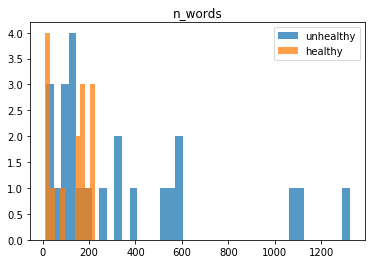

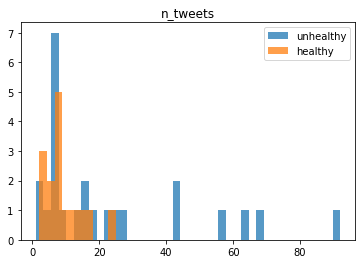

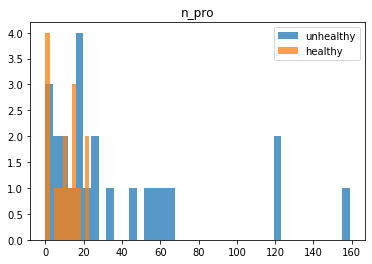

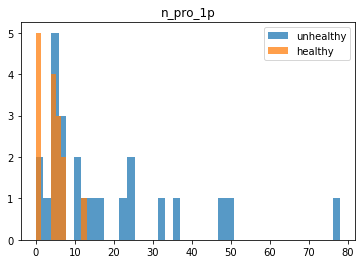

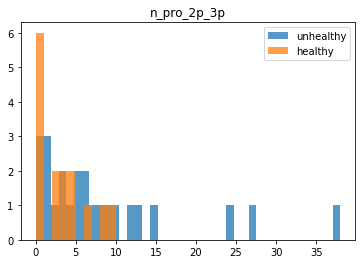

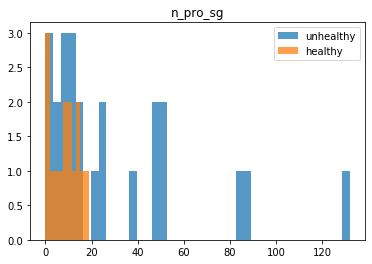

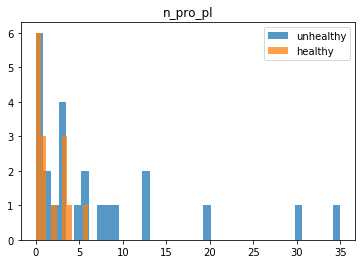

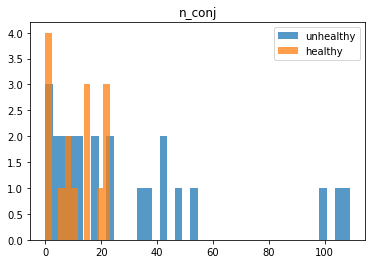

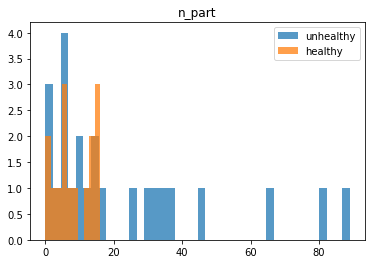

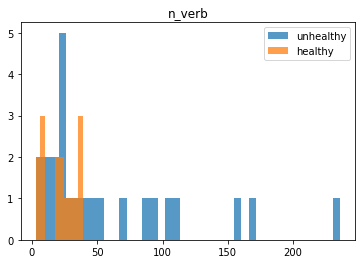

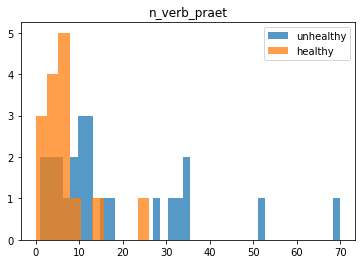

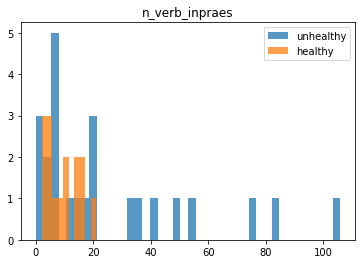

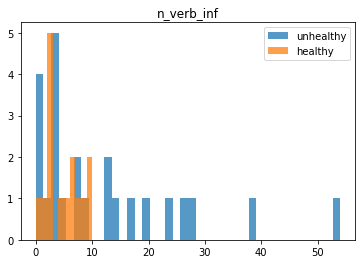

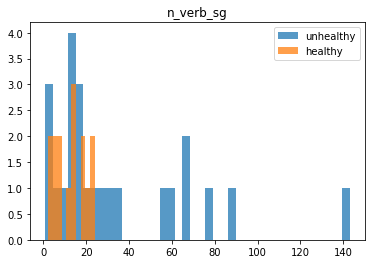

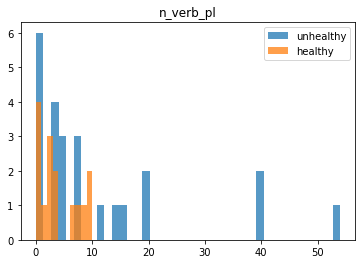

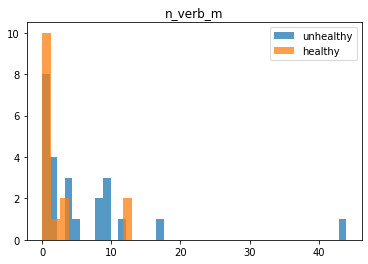

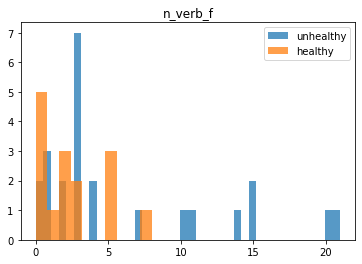

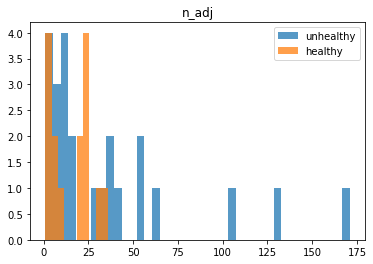

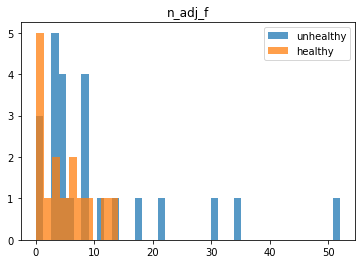

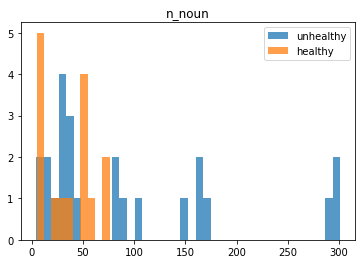

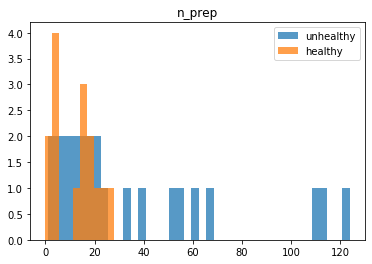

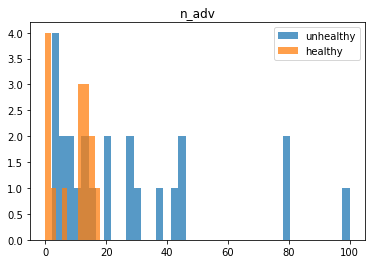

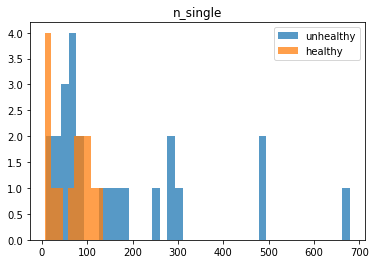

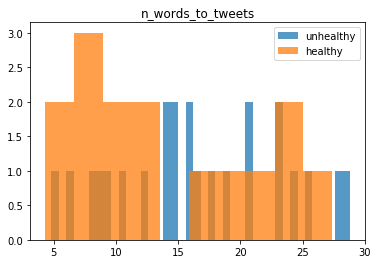

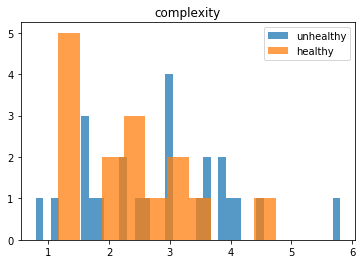

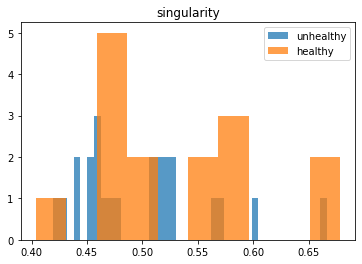

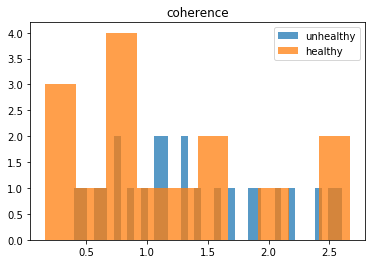

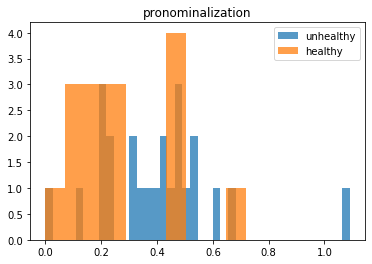

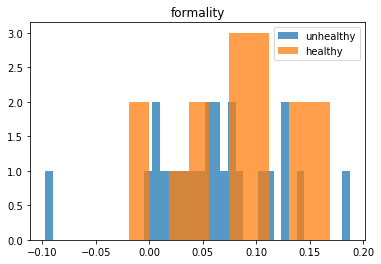

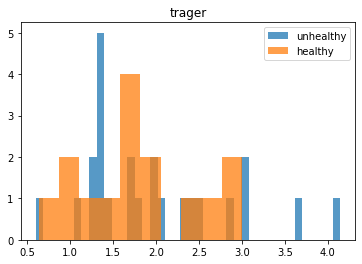

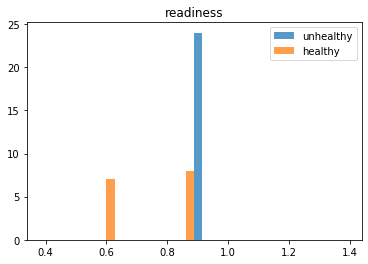

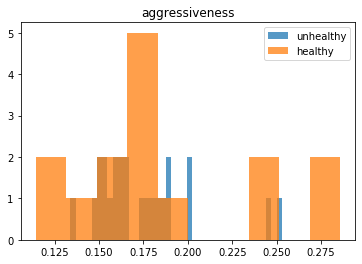

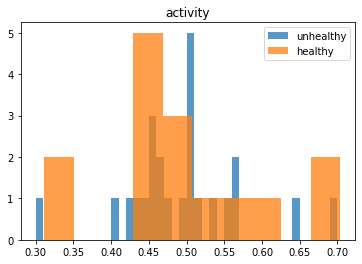

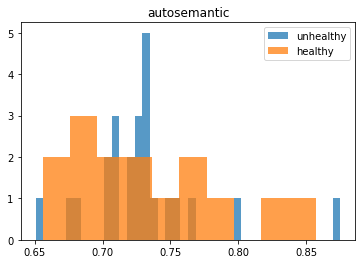

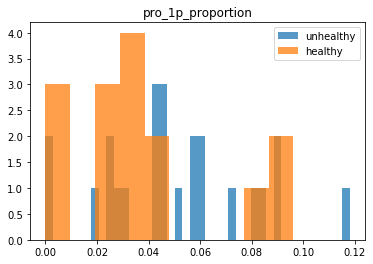

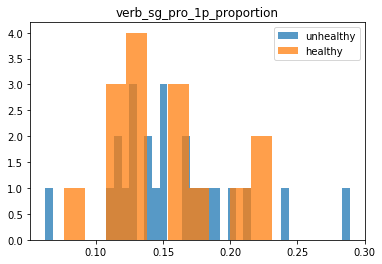

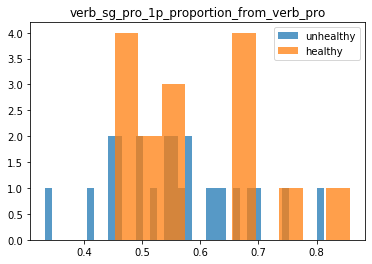

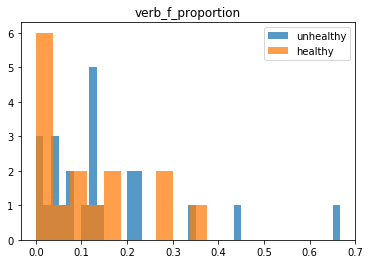

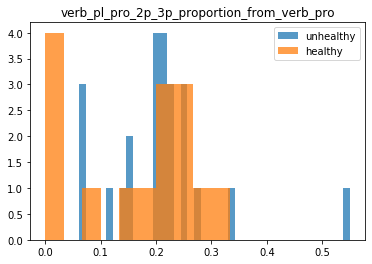

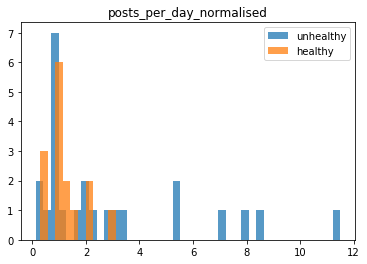

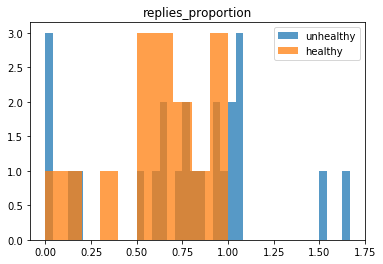

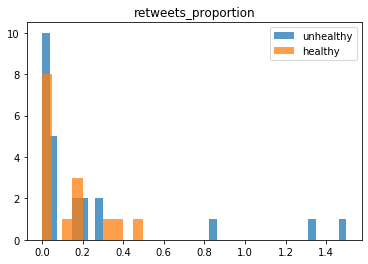

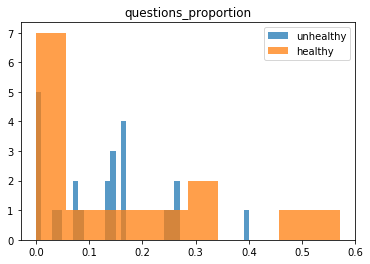

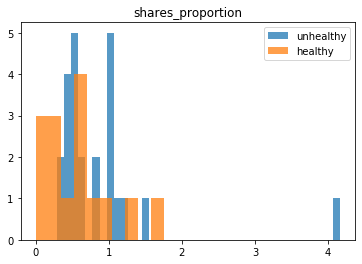

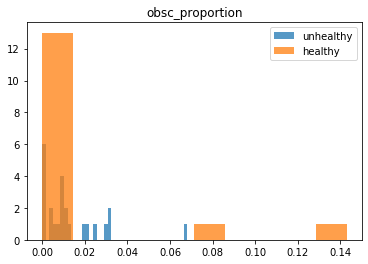

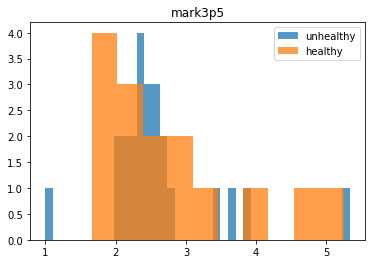

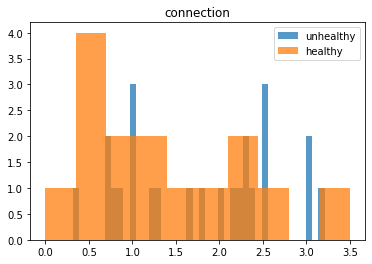

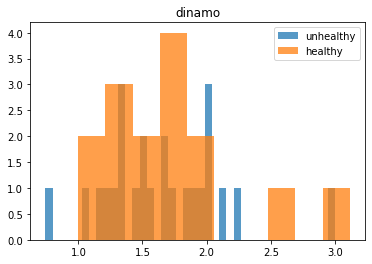

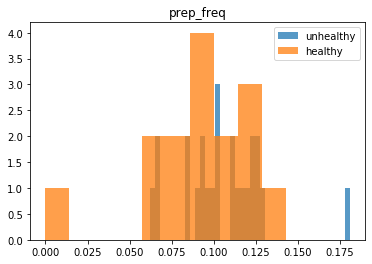

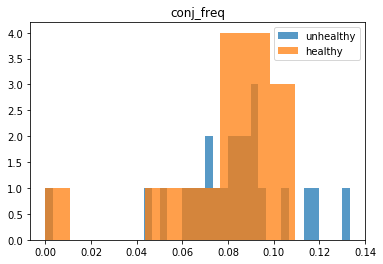

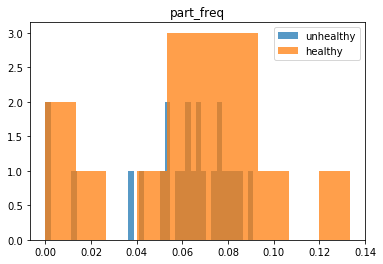

In [39]:
import matplotlib.pyplot as plt
for i in data_total_2.loc[:, 'n_words':'part_freq'].columns:
    data_total_2[data_total_2['binary_labels'] == 'unhealthy'][i].hist(grid=False, alpha=0.75, bins=40)
    data_total_2[data_total_2['binary_labels'] == 'healthy'][i].hist(grid=False, alpha=0.75, bins=10)
    plt.legend(['unhealthy', 'healthy'])
    plt.title(i)
    plt.show()

### Построим "облака слов"

In [40]:
import matplotlib.pyplot as plt 
!pip install wordcloud
from wordcloud import WordCloud

def print_cloud(texts):
    wordcloud = WordCloud(width = 500, height = 200, 
                          random_state = 40, max_font_size = 80,
                          background_color="white", regexp=r"[\w\d\(\)]+").generate(texts)
    plt.figure(figsize =(10,7))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    
healthy = data_total_2[data_total_2['binary_labels'] == 'healthy']['texts_tokenized_clean'].to_string()
unhealthy = data_total_2[data_total_2['binary_labels'] == 'unhealthy']['texts_tokenized_clean'].to_string()

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


#### Облако слов для класса Healthy

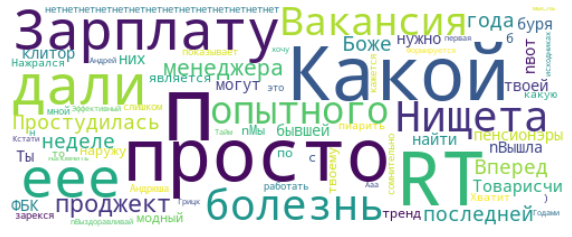

In [41]:
print_cloud(healthy)

#### Облако слов для класса Unhealthy

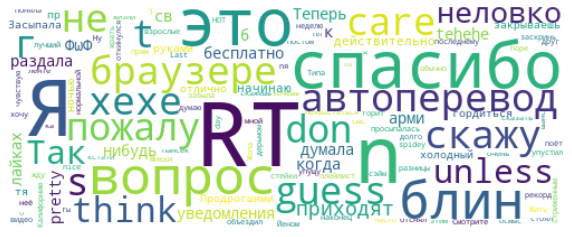

In [42]:
print_cloud(unhealthy)

### Обучим классификатор Random Forest для полученного набора признаков

#### С помощью GridSearchCV подберём параметры и оценим результаты работы классификатора по метрике ROC-AUC. 
#### Обучим классификатор на всех признаках:

In [96]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_All = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_All.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_All = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_All)

0.75


#### Рассмотрим важность признаков для обученной модели

Text(0.5, 0, 'Random Forest Feature Importance')

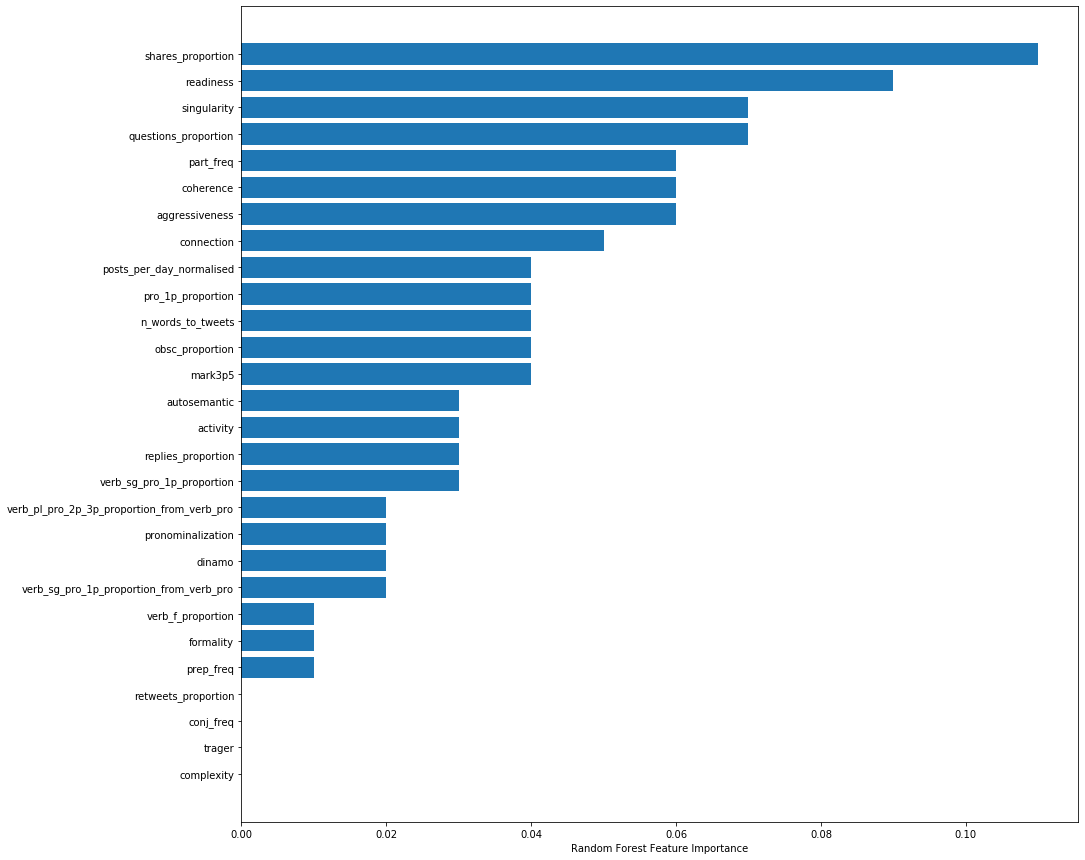

In [108]:
sorted_idx = RFC_GS_All.best_estimator_.feature_importances_.argsort()
figure = plt.figure(figsize=(15,15))
plt.barh(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'].columns[sorted_idx], RFC_GS_All.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Обучим классификатор на признаках, характеризующих вовлеченность пользователя в Твиттер и взаимодействие с другими пользователями:

In [46]:
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_Engagement = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_total_2.loc[:, 'posts_per_day_normalised':'shares_proportion'], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'posts_per_day_normalised':'shares_proportion'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_Engagement.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_Engagement = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_Engagement)

0.5833333333333334


#### Обучим классификатор только на текстовых признаках:

In [47]:
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)} 
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_Text = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_total_2.loc[:, ['n_words_to_tweets',
       'complexity', 'singularity', 'coherence', 'pronominalization',
       'formality', 'trager', 'readiness', 'aggressiveness', 'activity',
       'autosemantic', 'pro_1p_proportion', 'verb_sg_pro_1p_proportion',
       'verb_sg_pro_1p_proportion_from_verb_pro', 'verb_f_proportion',
       'verb_pl_pro_2p_3p_proportion_from_verb_pro', 'obsc_proportion',
       'mark3p5', 'connection', 'dinamo', 'prep_freq',
       'conj_freq', 'part_freq']], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, ['n_words_to_tweets',
       'complexity', 'singularity', 'coherence', 'pronominalization',
       'formality', 'trager', 'readiness', 'aggressiveness', 'activity',
       'autosemantic', 'pro_1p_proportion', 'verb_sg_pro_1p_proportion',
       'verb_sg_pro_1p_proportion_from_verb_pro', 'verb_f_proportion',
       'verb_pl_pro_2p_3p_proportion_from_verb_pro', 'obsc_proportion',
       'mark3p5', 'connection', 'dinamo', 'prep_freq',
       'conj_freq', 'part_freq']],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_Text.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_Text = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_Text)

0.8333333333333333


### Обучим SVM классификатор для полученного набора признаков

#### С помощью GridSearchCV подберём параметры и оценим результаты работы классификатора по метрике ROC-AUC. 
#### Обучим классификатор на всех признаках:

In [97]:
param_grid= {'kernel': ('linear', 'rbf'), 'C': range(1, 101)}
SVC_estimator = SVC(gamma=0.001, probability=True)
SVC_GS_All = GridSearchCV(SVC_estimator, param_grid, cv=3).fit(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = SVC_GS_All.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_SVC_All = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_SVC_All)

0.7083333333333334


#### Обучим классификатор на признаках, характеризующих вовлеченность пользователя в Твиттер и взаимодействие с другими пользователями:

In [98]:
param_grid= {'kernel': ('linear', 'rbf'), 'C': range(1, 101)}
SVC_estimator = SVC(gamma=0.001, probability=True)
SVC_GS_Engagement = GridSearchCV(SVC_estimator, param_grid, cv=3).fit(data_total_2.loc[:, 'posts_per_day_normalised':'shares_proportion'], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'posts_per_day_normalised':'shares_proportion'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = SVC_GS_Engagement.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_SVC_Engagement = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_SVC_Engagement)

0.7083333333333334


#### Обучим классификатор только на текстовых признаках:

In [99]:
param_grid= {'kernel': ('linear', 'rbf'), 'C': range(1, 101)}
SVC_estimator = SVC(gamma=0.001, probability=True)
SVC_GS_Text = GridSearchCV(SVC_estimator, param_grid, cv=3).fit(data_total_2.loc[:, ['n_words_to_tweets',
       'complexity', 'singularity', 'coherence', 'pronominalization',
       'formality', 'trager', 'readiness', 'aggressiveness', 'activity',
       'autosemantic', 'pro_1p_proportion', 'verb_sg_pro_1p_proportion',
       'verb_sg_pro_1p_proportion_from_verb_pro', 'verb_f_proportion',
       'verb_pl_pro_2p_3p_proportion_from_verb_pro', 'obsc_proportion',
       'mark3p5', 'connection', 'dinamo', 'prep_freq',
       'conj_freq', 'part_freq']], data_total_2['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:,['n_words_to_tweets',
       'complexity', 'singularity', 'coherence', 'pronominalization',
       'formality', 'trager', 'readiness', 'aggressiveness', 'activity',
       'autosemantic', 'pro_1p_proportion', 'verb_sg_pro_1p_proportion',
       'verb_sg_pro_1p_proportion_from_verb_pro', 'verb_f_proportion',
       'verb_pl_pro_2p_3p_proportion_from_verb_pro', 'obsc_proportion',
       'mark3p5', 'connection', 'dinamo', 'prep_freq',
       'conj_freq', 'part_freq']],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = SVC_GS_Text.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_SVC_Text = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_SVC_Text)

0.5416666666666666


### Обучим XGBoost классификатор для полученного набора признаков

#### Обучим классификатор на всех признаках:

In [51]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGBC_All = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'n_words_to_tweets':'part_freq'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = XGBC_All.fit(X_train, y_train)
ROC_AUC_XGBC_All = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_XGBC_All)

0.5833333333333334


#### Обучим классификатор на признаках, характеризующих вовлеченность пользователя в Твиттер и взаимодействие с другими пользователями:

In [52]:
XGBC_Engagement = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, 'posts_per_day_normalised':'shares_proportion'],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = XGBC_Engagement.fit(X_train, y_train)
ROC_AUC_XGBC_Engagement = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_XGBC_Engagement)

0.5833333333333334


#### Обучим классификатор только на текстовых признаках:

In [53]:
XGBC_Text = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(data_total_2.loc[:, ['n_words_to_tweets',
       'complexity', 'singularity', 'coherence', 'pronominalization',
       'formality', 'trager', 'readiness', 'aggressiveness', 'activity',
       'autosemantic', 'pro_1p_proportion', 'verb_sg_pro_1p_proportion',
       'verb_sg_pro_1p_proportion_from_verb_pro', 'verb_f_proportion',
       'verb_pl_pro_2p_3p_proportion_from_verb_pro', 'obsc_proportion',
       'mark3p5', 'connection', 'dinamo', 'prep_freq',
       'conj_freq', 'part_freq']],
                      data_total_2.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = XGBC_Text.fit(X_train, y_train)
ROC_AUC_XGBC_Text = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_XGBC_Text)

0.8333333333333334


#### Сведём полученные результаты в таблицу

In [100]:
results = pd.DataFrame([
    [ROC_AUC_RFC_All, ROC_AUC_SVC_All, ROC_AUC_XGBC_All], 
    [ROC_AUC_RFC_Engagement, ROC_AUC_SVC_Engagement, ROC_AUC_XGBC_Engagement],
    [ROC_AUC_RFC_Text, ROC_AUC_SVC_Text, ROC_AUC_XGBC_Text]
                       ], 
    columns=['RFC', 'SVC', 'XGBC'], index=['All', 'Engagement', 'Text'])
results

,RFC,SVC,XGBC
All,0.750000,0.708333,0.583333
Engagement,0.583333,0.708333,0.583333
Text,0.833333,0.541667,0.833333


#### Здесь Engagement - набор признаков, характеризующих вовлеченность пользователя в Твиттер (Нормированное число постов в день, доли ретвитов, ответов, упоминаний, вопросов, сторонних материалов(фото, видео, ссылок и т.д.))
#### Text - набор признаков, характеризующих текст
#### All - совокупность Engagement и Text

## Обучение на словарных признаках

### Воспользуемся Linguistic Inquiry and Word Count

In [55]:
!pip install liwc

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [56]:
import liwc
parse, category_names = liwc.load_token_parser('C:\\Users\\Admin\\Desktop\\NLP\\Russian_LIWC2007.dic')

In [59]:
dictionary = liwc.read_dic('C:\\Users\\Admin\\Desktop\\NLP\\Russian_LIWC2007.dic')

#### Загрузим словари когнитивной деятельности человека

In [60]:
insight_dict = []
discrepancy_dict = []
tentative_dict = []

In [61]:
for key in dictionary[0].keys():
    if 'Интуиция' in dictionary[0][key]:
        insight_dict.append(key)
    if 'Несоответствие' in dictionary[0][key]:
        discrepancy_dict.append(key)
    if 'Попытка' in dictionary[0][key]:
        tentative_dict.append(key)   

#### Загрузим словари эмоциональной лексики

In [62]:
negative_dict = []
positive_dict = []
anger_dict = []
anxiety_dict = []
sadness_dict = []

In [63]:
for key in dictionary[0].keys():
    if 'Негатив' in dictionary[0][key]:
        negative_dict.append(key)
    if 'Позитив' in dictionary[0][key]:
        positive_dict.append(key)
    if 'Гнев' in dictionary[0][key]:
        anger_dict.append(key)
    if 'Беспокойство' in dictionary[0][key]:
        anxiety_dict.append(key)
    if 'Грусть' in dictionary[0][key]:
        sadness_dict.append(key)

#### Создадим словарь абсолютистских слов

In [64]:
absolutist_dict = ['абсолютно', 'безусловно', 'конечно', 'совершенно', 'безусловно', 'стопроцентно', 'полностью',
'точно', 'несомненно', 'бесспорно', 'очевидно', 'верно', 'именно', 'правильно', 'неверно', 'четко', 'несомненный', 'весь',
'вечно', 'вечный', 'то и дело', 'определенно', 'ясно', 'однозначно', 'понятно', 'всегда', 'только', 'каждый',
'любой', 'наверняка', 'просто',
'обязательно', 'вовсе', 'непременно', 'необязательно', 'нужно',
'должен', 'необходимо', 'надо',
'обязан', 'никогда', 'ничего']

#### Сделаем функцию, которая оставляет в строке только слова, написанные на русском, без знаков препинания и прочих символов:

In [65]:
def remove_punctuation(word):
    return re.sub("[^-а-яА-Я]", "", str(word))

#### Соберём воедино все твиты здоровых пользователей, почистим их функцией, определенной выше и удалим стоп-слова

In [66]:
texts_healthy = pd.concat([data_total_2[data_total_2['binary_labels'] == 'healthy']['texts_tokenized']], axis=1).reset_index()

In [67]:
aio_texts_healthy = texts_healthy.loc[0, 'texts_tokenized']
for i in range(1, len(texts_healthy)):
    aio_texts_healthy += texts_healthy.loc[i, 'texts_tokenized']

In [68]:
aio_texts_healthy = list(map(remove_punctuation, aio_texts_healthy))

In [69]:
aio_texts_healthy_cleaned = [x.lower() for x in aio_texts_healthy if ((x.lower() not in stopwords) & (x.lower() not in ['', 'n', 'rt']))]

#### Выведем 50 самых популярных слов в этих твитах

In [70]:
pd.Series(aio_texts_healthy_cleaned).value_counts().head(50).index

Index(['это', '-', 'день', 'ещ', 'год', 'вообще', 'года', 'такая', 'люди',
       'хочу', 'купить', 'болезнь', 'работу', 'просто', 'тебе', 'писать',
       'друг', 'конца', 'блин', 'сегодня', 'жизни', 'зверей', 'вышла', 'самый',
       'работой', 'значит', 'пока', 'интересно', 'свой', 'оно', 'магазине',
       'которые', 'телефон', 'м', 'нужно', 'правильно', 'домой', 'еее',
       'каждый', 'назад', 'такое', 'настоящего', 'худеть', 'постоянно',
       'лучших', 'могу', 'поношенные', 'такие', 'кентавра', 'рт'],
      dtype='object')

#### Заметим, что осталось тире, т.к. мы учитывали, что некоторые слова записываются через дефис

#### Аналогично обработаем твиты нездоровых пользователей

In [71]:
texts_unhealthy = pd.concat([data_total_2[data_total_2['binary_labels'] == 'unhealthy']['texts_tokenized']], axis=1).reset_index()

In [72]:
aio_texts_unhealthy = texts_unhealthy.loc[0, 'texts_tokenized']
for i in range(1, len(texts_unhealthy)):
    aio_texts_unhealthy += texts_unhealthy.loc[i, 'texts_tokenized']

In [73]:
aio_texts_unhealthy = list(map(remove_punctuation, aio_texts_unhealthy))

In [74]:
aio_texts_unhealthy_cleaned = [x.lower() for x in aio_texts_unhealthy if ((x.lower() not in stopwords) & (x.lower() not in ['', 'n', 'rt', 'бтс', 'бантан', 'юнги', 'арми']))]

In [75]:
pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(50).index

Index(['это', 'просто', '-', 'очень', 'спасибо', 'хочу', 'ещ', 'почему',
       'сегодня', 'буду', 'жизни', 'люди', 'день', 'время', 'вс', 'люблю',
       'которые', 'тебе', 'который', 'жизнь', 'такое', 'е', 'пока', 'блять',
       'твиттер', 'людей', 'самый', 'бля', 'каждый', 'друг', 'слишком',
       'кажется', 'поняла', 'вопрос', 'стало', 'пиздец', 'свой', 'счастливый',
       'говорить', 'действительно', 'некоторые', 'возможно', 'блядь',
       'надеюсь', 'типа', 'моей', 'вообще', 'слова', 'могу', 'первый'],
      dtype='object')

#### Установим библиотеку, с помощью которой можно лемматизировать текст

In [76]:
!pip install pymorphy2

You should consider upgrading via the 'c:\users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [77]:
import pymorphy2

In [78]:
morph=pymorphy2.MorphAnalyzer()

#### Лемматизируем коллекцию твитов нездоровых пользователей

In [79]:
aio_texts_unhealthy_cleaned = list(map(lambda i : morph.parse(i)[0].normal_form, aio_texts_unhealthy_cleaned))

In [80]:
pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(50).index

Index(['это', 'хотеть', 'человек', 'быть', 'который', 'просто', '-', 'свой',
       'такой', 'спасибо', 'очень', 'жизнь', 'день', 'ещ', 'друг', 'почему',
       'хороший', 'мой', 'твиттер', 'самый', 'сегодня', 'время', 'стать',
       'сказать', 'блядь', 'мочь', 'смотреть', 'любить', 'знать', 'первый',
       'каждый', 'вс', 'говорить', 'сидеть', 'ты', 'этот', 'работа', 'найти',
       'песня', 'какой-то', 'женщина', 'понять', 'твой', 'сделать', 'год',
       'один', 'идти', 'видеть', 'счастливый', 'слово'],
      dtype='object')

#### Лемматизируем коллекцию твитов здоровых пользователей

In [81]:
aio_texts_healthy_cleaned = list(map(lambda i : morph.parse(i)[0].normal_form, aio_texts_healthy_cleaned))

In [82]:
pd.Series(aio_texts_healthy_cleaned).value_counts().head(50).index

Index(['это', '-', 'такой', 'год', 'работа', 'день', 'самый', 'друг', 'хотеть',
       'ещ', 'мой', 'человек', 'новогодний', 'магазин', 'этот', 'хороший',
       'вообще', 'который', 'свой', 'жизнь', 'ты', 'быть', 'хватить', 'один',
       'писать', 'никто', 'болезнь', 'купить', 'говорить', 'думать', 'конец',
       'просто', 'каждый', 'телефон', 'блин', 'справиться', 'ребята', 'дело',
       'приложение', 'зверь', 'значит', 'мочь', 'сегодня', 'решить', 'первый',
       'дом', 'посмотреть', 'дать', 'знать', 'настоящий'],
      dtype='object')

#### Посмотрим по каким словам отличаются списки самых популярных слов этих двух коллекций

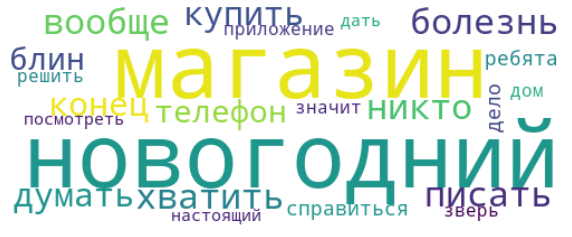

In [145]:
print_cloud(str([x for x in pd.Series(aio_texts_healthy_cleaned).value_counts().head(50).index if x not in pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(50).index]))

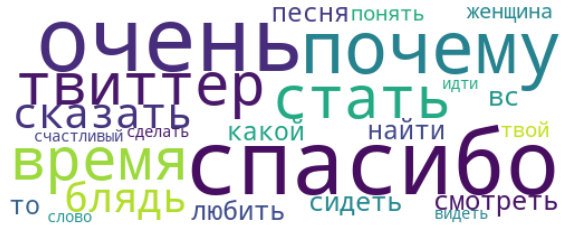

In [146]:
print_cloud(str([x for x in pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(50).index if x not in pd.Series(aio_texts_healthy_cleaned).value_counts().head(50).index]))

#### Соберём словари самых популярных слов

In [85]:
top50_healthy_dict = pd.Series(aio_texts_healthy_cleaned).value_counts().head(50).index
top25_healthy_dict = pd.Series(aio_texts_healthy_cleaned).value_counts().head(25).index
top10_healthy_dict = pd.Series(aio_texts_healthy_cleaned).value_counts().head(10).index
top50_unhealthy_dict = pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(50).index
top25_unhealthy_dict = pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(25).index
top10_unhealthy_dict = pd.Series(aio_texts_unhealthy_cleaned).value_counts().head(10).index

#### Построим DataFrame для обучения моделей на словарных признаках

In [119]:
data_voc = data_total_2.loc[:, ['texts', 'texts_tokenized', 'binary_labels']]

In [120]:
texts_lemmatized = []
for i in range(len(data_voc)):
    text = list(map(remove_punctuation, data_voc.loc[i, 'texts_tokenized']))
    text_cleaned = [x.lower() for x in text if ((x.lower() not in stopwords) & (x.lower() not in ['', 'n', 'rt']))]
    text_cleaned_lemmatized = list(map(lambda i : morph.parse(i)[0].normal_form, text_cleaned))
    texts_lemmatized.append(text_cleaned_lemmatized)
data_voc['texts_lemmatized'] = texts_lemmatized

In [121]:
data_voc = data_voc.loc[:, ['texts', 'texts_tokenized', 'texts_lemmatized', 'binary_labels']]

#### Удалим знаки препинания и специальные символы из словарей LIWC

In [89]:
negative_dict = list(map(remove_punctuation, negative_dict))
positive_dict = list(map(remove_punctuation, positive_dict))
anger_dict = list(map(remove_punctuation, anger_dict))
anxiety_dict = list(map(remove_punctuation, anxiety_dict))
sadness_dict = list(map(remove_punctuation, sadness_dict))
insight_dict = list(map(remove_punctuation, insight_dict))
discrepancy_dict = list(map(remove_punctuation, discrepancy_dict))
tentative_dict = list(map(remove_punctuation, tentative_dict))

#### Рассчитаем признаки для каждого текста. Каждый признак - доля слов, входящих в словарь этого признака

In [125]:
top50_healthy = [0] * len(data_voc)
top25_healthy = [0] * len(data_voc)
top10_healthy = [0] * len(data_voc)
top50_unhealthy = [0] * len(data_voc)
top25_unhealthy = [0] * len(data_voc)
top10_unhealthy = [0] * len(data_voc)
absolutist = [0] * len(data_voc)
negative = [0] * len(data_voc)
positive = [0] * len(data_voc)
anger = [0] * len(data_voc)
anxiety = [0] * len(data_voc)
sadness = [0] * len(data_voc)
insight = [0] * len(data_voc)
discrepancy = [0] * len(data_voc)
tentative = [0] * len(data_voc)
for i in range(len(data_voc)):
    for word in data_voc.loc[i, 'texts_lemmatized']:
        if word in top50_healthy_dict:
            top50_healthy[i] += 1
        if word in top25_healthy_dict:
            top25_healthy[i] += 1
        if word in top10_healthy_dict:
            top10_healthy[i] += 1
        if word in top50_unhealthy_dict:
            top50_unhealthy[i] += 1
        if word in top25_unhealthy_dict:
            top25_unhealthy[i] += 1
        if word in top10_unhealthy_dict:
            top10_unhealthy[i] += 1
        if word in absolutist_dict:
            absolutist[i] += 1
        for word2 in negative_dict:
            if word.find(word2) != -1:
                negative[i] += 1
                break
        for word2 in positive_dict[1:]:
            if word.find(word2) != -1:
                positive[i] += 1
                break
        for word2 in anger_dict:
            if word.find(word2) != -1:
                anger[i] += 1
                break
        for word2 in anxiety_dict:
            if word.find(word2) != -1:
                anxiety[i] += 1
                break
        for word2 in sadness_dict:
            if word.find(word2) != -1:
                sadness[i] += 1
                break
        for word2 in insight_dict:
            if word.find(word2) != -1:
                insight[i] += 1
                break
        for word2 in discrepancy_dict:
            if word.find(word2) != -1:
                discrepancy[i] += 1
                break
        for word2 in tentative_dict:
            if word.find(word2) != -1:
                tentative[i] += 1
                break
    top50_healthy[i] = top50_healthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    top25_healthy[i] = top25_healthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    top10_healthy[i] = top10_healthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    top50_unhealthy[i] = top50_unhealthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    top25_unhealthy[i] = top25_unhealthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    top10_unhealthy[i] = top10_unhealthy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    negative[i] = negative[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    positive[i] = positive[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    anger[i] = anger[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    anxiety[i] = anxiety[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    sadness[i] = sadness[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    insight[i] = insight[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    discrepancy[i] = discrepancy[i] / len(data_voc.loc[i, 'texts_lemmatized'])
    tentative[i] = tentative[i] / len(data_voc.loc[i, 'texts_lemmatized'])


data_voc['top50_healthy'] = top50_healthy
data_voc['top25_healthy'] = top25_healthy
data_voc['top10_healthy'] = top10_healthy
data_voc['top50_unhealthy'] = top50_unhealthy
data_voc['top25_unhealthy'] = top25_unhealthy
data_voc['top10_unhealthy'] = top10_unhealthy
data_voc['negative'] = negative
data_voc['positive'] = positive
data_voc['anger'] = anger
data_voc['anxiety'] = anxiety
data_voc['sadness'] = sadness
data_voc['insight'] = insight
data_voc['discrepancy'] = discrepancy
data_voc['tentative'] = tentative        

#### Обучим 3  модели на полученных данных, измерим их качество по метрике ROC AUC

In [147]:
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_Voc = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_voc.loc[:, 'top50_healthy':'tentative'], data_voc['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_voc.loc[:, 'top50_healthy':'tentative'],
                      data_voc.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_Voc.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_Voc = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_Voc)

0.875


In [148]:
param_grid= {'kernel': ('linear', 'rbf'), 'C': range(1, 101)}
SVC_estimator = SVC(gamma=0.001, probability=True)
SVC_GS_Voc = GridSearchCV(SVC_estimator, param_grid, cv=3).fit(data_voc.loc[:, 'top50_healthy':'tentative'], data_voc['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_voc.loc[:, 'top50_healthy':'tentative'],
                      data_voc.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = SVC_GS_Voc.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_SVC_Voc = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_SVC_Voc)

0.9583333333333334


In [149]:
XGBC_Voc = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(data_voc.loc[:, 'top50_healthy':'tentative'],
                      data_voc.loc[:,'binary_labels'], test_size=0.25, random_state=42)
clf = XGBC_Voc.fit(X_train, y_train)
ROC_AUC_XGBC_Voc = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_XGBC_Voc)

0.9166666666666667


#### Найдём наиболее важные признаки для Random Forest классификатора

Text(0.5, 0, 'Random Forest Feature Importance')

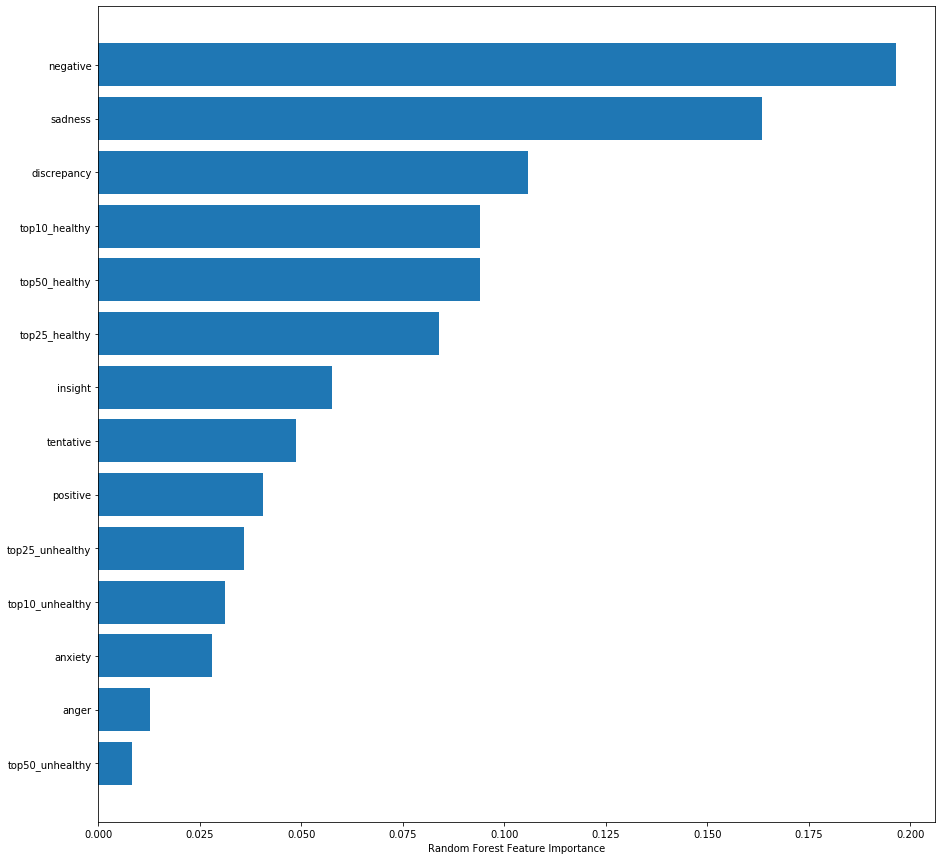

In [150]:
sorted_idx_voc = RFC_GS_Voc.best_estimator_.feature_importances_.argsort()
figure = plt.figure(figsize=(15,15))
plt.barh(data_voc.loc[:, 'top50_healthy':'tentative'].columns[sorted_idx_voc], RFC_GS_Voc.best_estimator_.feature_importances_[sorted_idx_voc])
plt.xlabel("Random Forest Feature Importance")

#### Обучим Random Forest классификатор на совокупности текстовых признаков, словарных признаков и признаков вовлеченности

In [151]:
data_all_features = pd.concat([data_voc, data_total_2.loc[:, 'n_words_to_tweets':'part_freq']],axis=1)

In [152]:
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_All_Voc = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_all_features.loc[:, 'top50_healthy':'part_freq'], data_all_features['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_all_features.loc[:, 'top50_healthy':'part_freq'],
                      data_all_features['binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_All_Voc.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_All_Voc = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_All_Voc)

0.7916666666666667


#### Обучим Random Forest классификатор на лучших из текстовых признаков, словарных признаков и признаков вовлеченности

In [157]:
data_best_features = pd.concat([data_voc['binary_labels'], data_voc.loc[:, data_voc.loc[:, 'top50_healthy':'tentative'].columns[sorted_idx_voc][-6:]], data_total_2.loc[:, data_total_2.loc[:, 'n_words_to_tweets':'part_freq'].columns[sorted_idx][-8:]]],axis=1)

In [158]:
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
base_estimator = RandomForestClassifier(n_estimators=100)
RFC_GS_Best = GridSearchCV(base_estimator, param_grid, cv=3).fit(data_best_features.loc[:, data_voc.loc[:, 'top50_healthy':'tentative'].columns[sorted_idx_voc][-6]:], data_best_features['binary_labels'])

X_train, X_test, y_train, y_test = train_test_split(data_best_features.loc[:, data_voc.loc[:, 'top50_healthy':'tentative'].columns[sorted_idx_voc][-6]:],
                      data_best_features['binary_labels'], test_size=0.25, random_state=42)
clf = RFC_GS_Best.best_estimator_.fit(
                    X_train,
                    y_train)
ROC_AUC_RFC_Best = roc_auc_score(lb.fit_transform(y_test), clf.predict_proba(X_test)[:, 1])
print(ROC_AUC_RFC_Best)

0.8333333333333334


#### Лучшей моделью оказался классификатор Random Forest Classifier на совокупном наборе лучших текстовых и словарных прзнаков, а также признаков активности в социальной сети. 
#### На тестовой выборке эта модель показала качество по метрике ROC-AUC = 0.833